# 🧠 Strategies Using Options

## Introduction

In this notebook, we will explore various **option trading strategies**, as outlined in Chapter 12 of John Hull's *Options, Futures, and Other Derivatives*. Option strategies allow traders and investors to tailor their positions to specific market views and risk preferences. We'll dive into popular strategies like **guaranteed capital, spreads and combinations**, with a focus on understanding their payoff profiles and risk-reward characteristics.

## 📊 Option Payoff Basics

Before jumping into specific strategies, let's review the basic payoffs for **call** and **put options**:

- **Call Option Payoff**: The payoff of a long call is:
  
  $$
  \text{Payoff} = \max(S_T - K, 0)
  $$

  Where:
  - $S_T$ is the price of the underlying asset at expiration.
  - $K$ is the strike price of the call option.

- **Put Option Payoff**: The payoff of a long put is:
  
  $$
  \text{Payoff} = \max(K - S_T, 0)
  $$

  These simple payoffs form the building blocks for more complex strategies.

## 🔄 Strategy Visualization

In this notebook, we will simulate and visualize the payoffs of these strategies using Python. By plotting these strategies, you'll be able to see how each one reacts to different price movements of the underlying asset at expiration.

### 📈 Payoff Charts

We'll generate **payoff charts** to compare the risk and reward profiles of different strategies. These charts will help us understand how each strategy behaves under various market conditions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Capital available : 164.72978858872796
We see that that we have a capital guaranteed investment that still lets us participate in the upside.


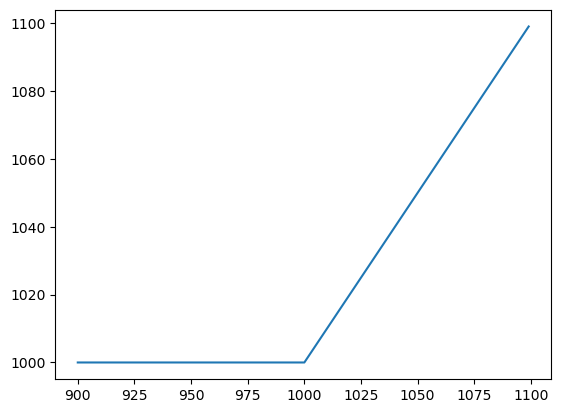

In [2]:
"""
Capital guaranteed strategy that implies a zero coupon bond + long call.
"""
# First, we define the bond
rf = 0.06
maturity = 3 
face_value = 1000

bond_value = face_value * np.exp(-rf * maturity)
capital_available = face_value - bond_value
print(f'Capital available : {capital_available}')

# Second, we define the call
strike = 1000
call_price = capital_available
call_payoff = [max(0, s - strike) for s in range(900, 1100)]

portfolio_payoff = [c + face_value for c in call_payoff]
portfolio_payoff = pd.Series(portfolio_payoff, index=range(900, 1100))
portfolio_payoff.plot()
print('We see that that we have a capital guaranteed investment that still lets us participate in the upside.')


<Axes: >

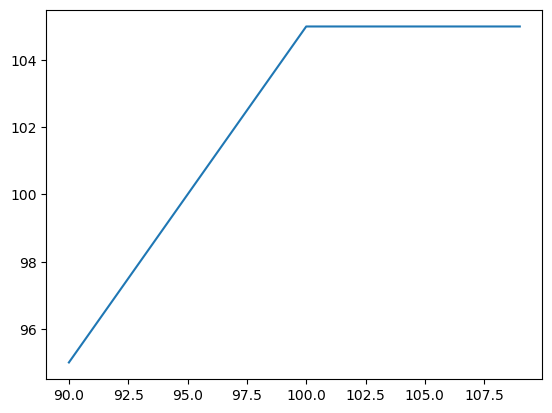

In [3]:
"""
Covered call : long stock + short call
"""
strike = 100
call_premium = 5

call_payoff = [max(0, s - strike) - call_premium for s in range(90, 110)]
stock_payoff = [s for s in range(90, 110)]
portfolio_payoff = [s - c for s, c in zip(stock_payoff, call_payoff)]
portfolio_payoff = pd.Series(portfolio_payoff, index=range(90, 110))
portfolio_payoff.plot()


## 💹 Bull and Bear Spreads

**Spreads** involve buying one option and selling another option with the same expiration date but different strike prices. They are used to limit risk while betting on moderate movements in the underlying asset's price.

### 🐂 Bull Call Spread

The **Bull Call Spread** is used when the trader expects a moderate rise in the price of the underlying asset. It involves:

- Buying a call option with a lower strike price ($K_1$).
- Selling a call option with a higher strike price ($K_2$).

The net payoff of a bull call spread is:

$$
\text{Payoff} = \max(S_T - K_1, 0) - \max(S_T - K_2, 0)
$$

### 🐻 Bear Put Spread

The **Bear Put Spread** is employed when the trader anticipates a moderate decline in the price of the underlying asset. It consists of:

- Buying a put option with a higher strike price ($K_1$).
- Selling a put option with a lower strike price ($K_2$).

The payoff for the bear put spread is:

$$
\text{Payoff} = \max(K_1 - S_T, 0) - \max(K_2 - S_T, 0)
$$

We'll visualize these strategies and calculate their maximum potential profits and losses.

### 🦋 Butterfly Spread

The **Butterfly Spread** is a neutral strategy designed to profit from low volatility. It involves:

- Buying one call option at a lower strike ($K_1$).
- Selling two call options at a middle strike ($K_2$).
- Buying one call option at a higher strike ($K_3$).

The payoff is:

$$
\text{Payoff} = \max(S_T - K_1, 0) - 2\max(S_T - K_2, 0) + \max(S_T - K_3, 0)
$$

This strategy limits both risk and reward, making it a low-cost, low-risk way to bet on low volatility.

### 📦 Box Spread

A **Box Spread** combines a bull call spread and a bear put spread to create a **risk-free position** (arbitrage), assuming perfect pricing. It involves:

- Buying a bull call spread.
- Buying a bear put spread.

The box spread offers a way to lock in risk-free profit if the options are mispriced, but it usually yields low returns.

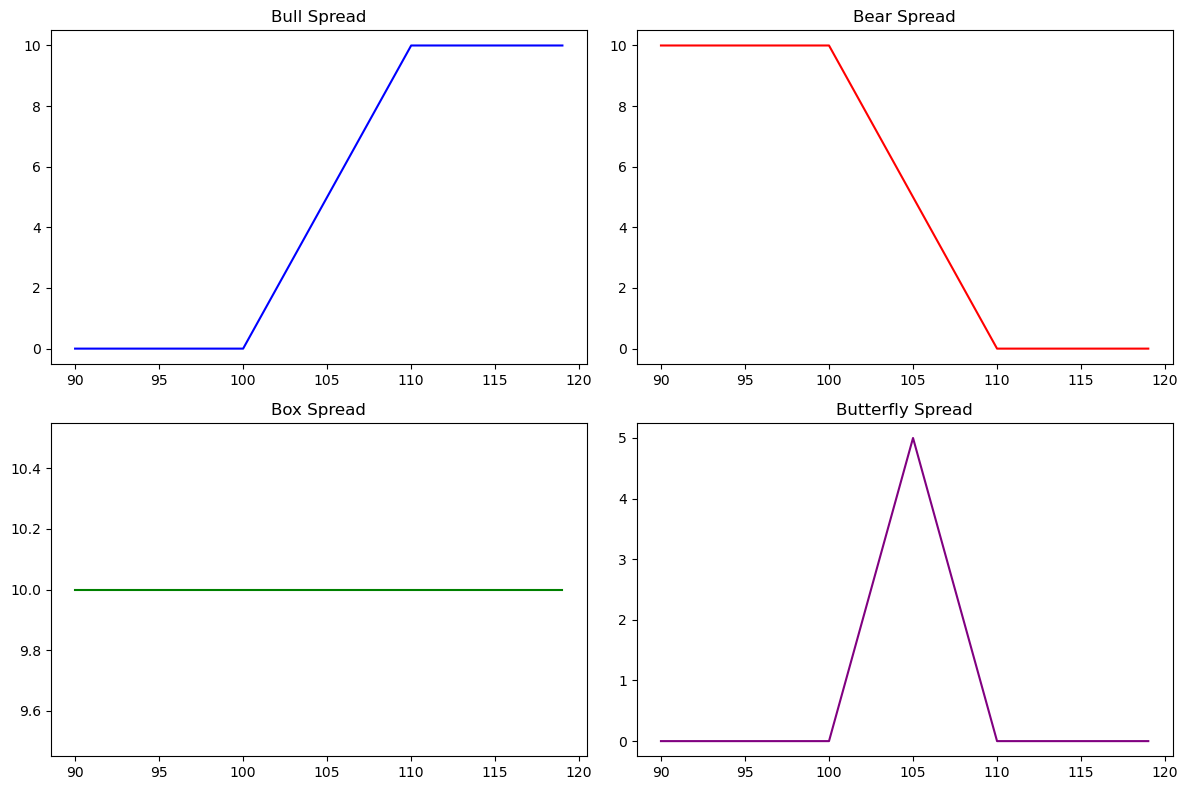

In [4]:
"""
Spreads Stragies : Bull spread, Bear spread, Butterfly spread
"""
# ======= I. Bull spread
call_K1 = 100
call_K2 = 110

call_payoff1 = [max(0, s - call_K1) for s in range(90, 120)]
call_payoff2 = [max(0, s - call_K2) for s in range(90, 120)]

bullspread_payoff = [c1 - c2 for c1, c2 in zip(call_payoff1, call_payoff2)]
bullspread_payoff = pd.Series(bullspread_payoff, index=range(90, 120))

# ======= II. Bear spread
put_K1 = 100
put_K2 = 110

put_payoff1 = [max(0, put_K1 - s) for s in range(90, 120)]
put_payoff2 = [max(0, put_K2 - s) for s in range(90, 120)]

bearspread_payoff = [p2 - p1 for p1, p2 in zip(put_payoff1, put_payoff2)]
bearspread_payoff = pd.Series(bearspread_payoff, index=range(90, 120))

# ======= III. Box spread
boxspread_payoff = [c1 - c2 - p1 + p2 for c1, c2, p1, p2 in zip(call_payoff1, call_payoff2, put_payoff1, put_payoff2)]
boxspread_payoff = pd.Series(boxspread_payoff, index=range(90, 120))

# ======= IV. Butterfly spread
call_K1 = 100
call_K2 = 105
call_K3 = 110

call_payoff1 = [max(0, s - call_K1) for s in range(90, 120)]
call_payoff2 = [max(0, s - call_K2) for s in range(90, 120)]
call_payoff3 = [max(0, s - call_K3) for s in range(90, 120)]

butterflyspread_payoff = [c1 - 2*c2 + c3 for c1, c2, c3 in zip(call_payoff1, call_payoff2, call_payoff3)]
butterflyspread_payoff = pd.Series(butterflyspread_payoff, index=range(90, 120))

# ======= V. Plotting
prices = range(90, 120)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(prices, bullspread_payoff, color="blue", linestyle="-")
axes[0, 0].set_title("Bull Spread")

axes[0, 1].plot(prices, bearspread_payoff, color="red", linestyle="-")
axes[0, 1].set_title("Bear Spread")

axes[1, 0].plot(prices, boxspread_payoff, color="green", linestyle="-")
axes[1, 0].set_title("Box Spread")

axes[1, 1].plot(prices, butterflyspread_payoff, color="purple", linestyle="-")
axes[1, 1].set_title("Butterfly Spread")

plt.tight_layout()
plt.show()

## 🔀 Straddles and Strangles

Straddles and strangles are **volatility strategies** used when the trader expects significant price movement, but is uncertain about the direction.

### ✂️ Long Straddle

The **Long Straddle** involves buying both a call and a put with the same strike price ($K$) and expiration date. This strategy profits from large price movements in either direction:

$$
\text{Payoff} = \max(S_T - K, 0) + \max(K - S_T, 0)
$$

A long straddle has unlimited upside potential but requires substantial price movement to cover the cost of both options.

### 🔄 Long Strangle

The **Long Strangle** is similar to the straddle but uses options with different strike prices. It involves:

- Buying a call option with a higher strike price ($K_2$).
- Buying a put option with a lower strike price ($K_1$).

This strategy is cheaper than a straddle, but it requires a larger price movement for the position to become profitable.


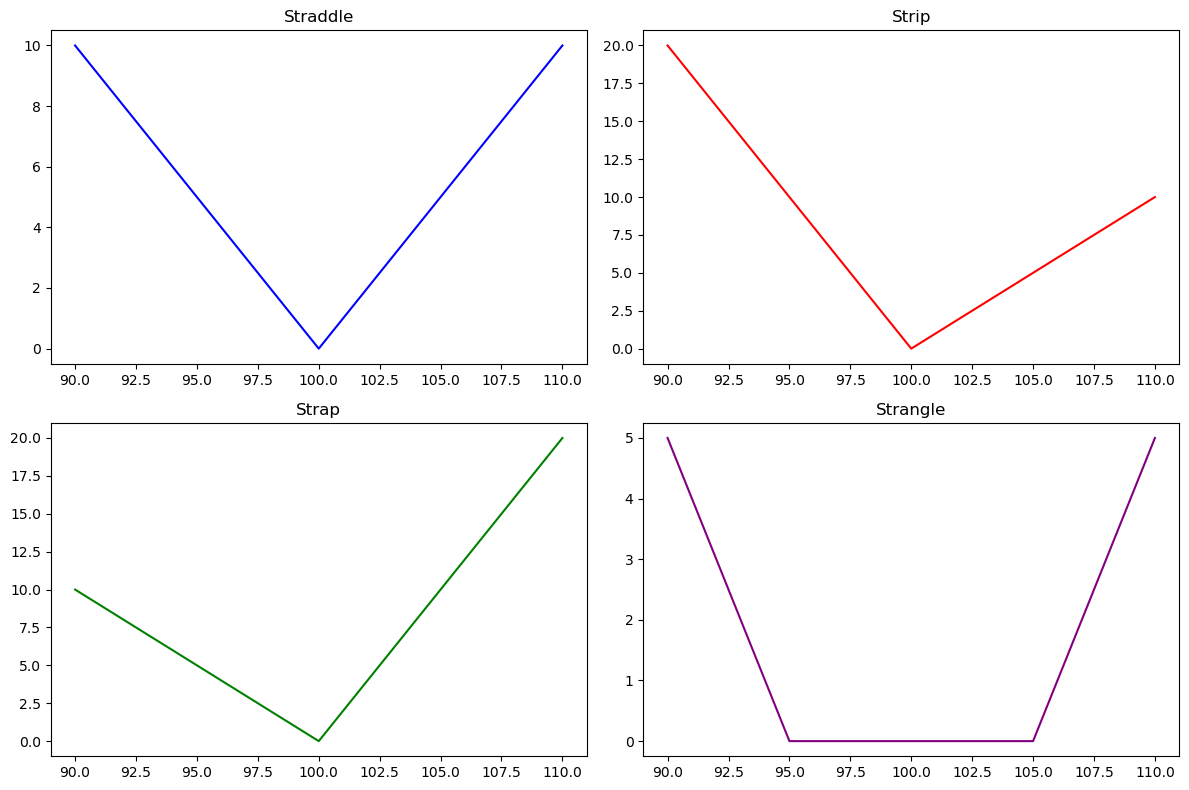

In [5]:
"""
Combinations of options : Straddle, Strangle, Strip, Strap.
"""

# ======= I. Straddle
K = 100
call_payoff = [max(0, s - K) for s in range(90, 111)]
put_payoff = [max(0, K - s) for s in range(90, 111)]

straddle_payoff = [c + p for c, p in zip(call_payoff, put_payoff)]
straddle_payoff = pd.Series(straddle_payoff, index=range(90, 111))

# ======= II. Strip & Strap
K = 100
call_payoff = [max(0, s - K) for s in range(90, 111)]
put_payoff = [max(0, K - s) for s in range(90, 111)]

strip_payoff = [2*p + c for c, p in zip(call_payoff, put_payoff)]
strip_payoff = pd.Series(strip_payoff, index=range(90, 111))

strap_payoff = [p + 2*c for c, p in zip(call_payoff, put_payoff)]
strap_payoff = pd.Series(strap_payoff, index=range(90, 111))

# ======= III. Strangle
K1 = 95
K2 = 105

call_payoff = [max(0, s - K2) for s in range(90, 111)]
put_payoff = [max(0, K1 - s) for s in range(90, 111)]

strangle_payoff = [c + p for c, p in zip(call_payoff, put_payoff)]
strangle_payoff = pd.Series(strangle_payoff, index=range(90, 111))

# ======= V. Plotting
prices = range(90, 111)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(prices, straddle_payoff, color="blue", linestyle="-")
axes[0, 0].set_title("Straddle")

axes[0, 1].plot(prices, strip_payoff, color="red", linestyle="-")
axes[0, 1].set_title("Strip")

axes[1, 0].plot(prices, strap_payoff, color="green", linestyle="-")
axes[1, 0].set_title("Strap")

axes[1, 1].plot(prices, strangle_payoff, color="purple", linestyle="-")
axes[1, 1].set_title("Strangle")

plt.tight_layout()
plt.show()


***Problems & Exercise***

<Axes: >

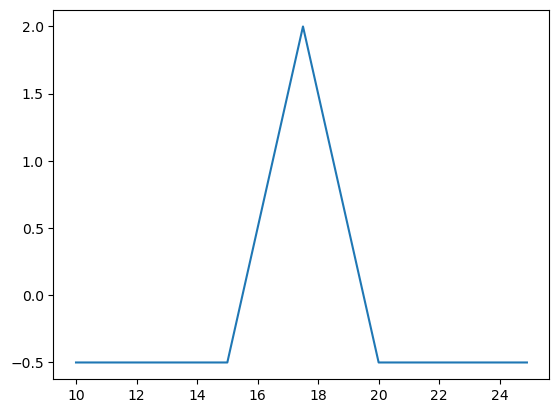

In [6]:
# 12.7
"""
Create a Butterfly Spread.
"""
K1 = 15
K2 = 17.5
K3 = 20
maturity = 3/12
price1 = 4
price2 = 2
price3 = 0.5

# Let's create a butterfly spread
call_payoff1 = [max(0, s - K1) - price1 for s in np.arange(10, 25, 0.1)]
call_payoff2 = [max(0, s - K2) - price2 for s in np.arange(10, 25, 0.1)]
call_payoff3 = [max(0, s - K3) - price3 for s in np.arange(10, 25, 0.1)]

butterfly_payoff = [c1 - 2*c2 + c3 for c1, c2, c3 in zip(call_payoff1, call_payoff2, call_payoff3)]
butterfly_payoff = pd.Series(butterfly_payoff, index=np.arange(10, 25, 0.1))
butterfly_payoff.plot()

<Axes: >

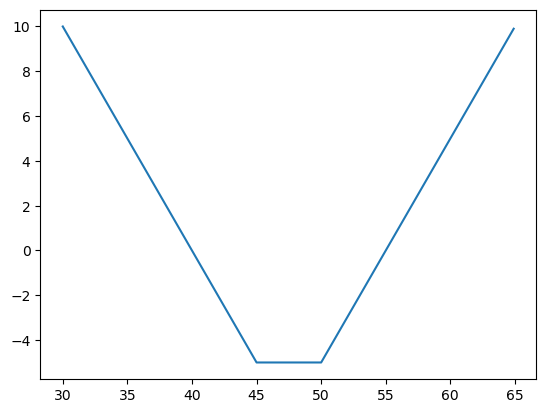

In [7]:
# 12.8
"""
Creating a strangle.
"""
call_K = 50
call_price = 2
put_K = 45
put_price = 3

call_payoff = [max(0, s - call_K) - call_price for s in np.arange(30, 65, 0.1)]
put_payoff = [max(0, put_K - s) - put_price for s in np.arange(30, 65, 0.1)]

strangle_payoff = [c + p for c, p in zip(call_payoff, put_payoff)]
strangle_payoff = pd.Series(strangle_payoff, index=np.arange(30, 65, 0.1))
strangle_payoff.plot()

<Axes: >

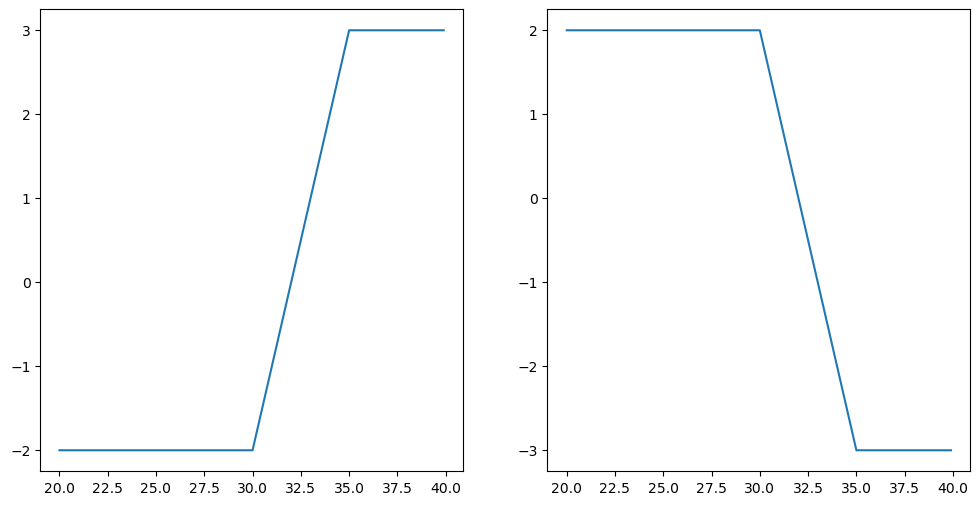

In [8]:
# 12.11
"""
Creating both bear & bull spreads.
"""
put_K1 = 30
put_K2 = 35

put_price1 = 4
put_price2 = 7

put_payoff1 = [max(0, put_K1 - s) - put_price1 for s in np.arange(20, 40, 0.1)]
put_payoff2 = [max(0, put_K2 - s) - put_price2 for s in np.arange(20, 40, 0.1)]

# bull spread
bullspread_payoff = [p1 - p2 for p1, p2 in zip(put_payoff1, put_payoff2)]
bullspread_payoff = pd.Series(bullspread_payoff, index=np.arange(20, 40, 0.1))

# bear spread
bearspread_payoff = [-p1 + p2 for p1, p2 in zip(put_payoff1, put_payoff2)]
bearspread_payoff = pd.Series(bearspread_payoff, index=np.arange(20, 40, 0.1))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
bullspread_payoff.plot(ax=axes[0])
bearspread_payoff.plot(ax=axes[1])

In [10]:
# 12.12 
"""
Example that a butterfly spread has the same cost using call options or put options.
"""
spot = 17.5

K1 = 15
K2 = 17.5
K3 = 20

call_price1 = 4
call_price2 = 2
call_price3 = 0.5

call_butterfly_cost = call_price1 - 2*call_price2 + call_price3

# Now, let's price the puts using call-put parity
put_price1 = call_price1 - spot + K1
put_price2 = call_price2 - spot + K2
put_price3 = call_price3 - spot + K3

put_butterfly_cost = put_price1 - 2*put_price2 + put_price3

print(f'Call butterfly cost : {call_butterfly_cost}')
print(f'Put butterfly cost : {put_butterfly_cost}')

Call butterfly cost : 0.5
Put butterfly cost : 0.5


You lose money if the stock price is between 50.00000000000014 and 69.90000000000043.


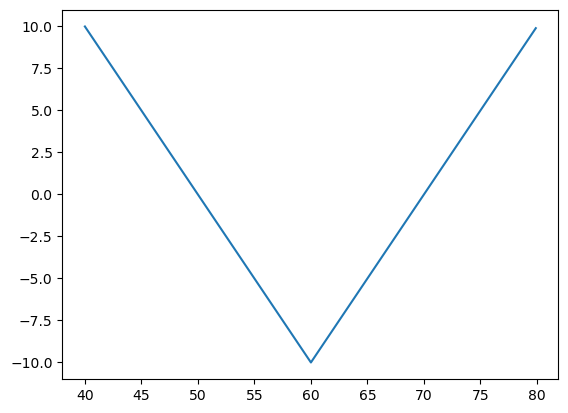

In [16]:
# 12.13
"""
Payoff of a straddle.
"""
K = 60
call_price = 6
put_price = 4

call_payoff = [max(0, s - K) - call_price for s in np.arange(40, 80, 0.1)]
put_payoff = [max(0, K - s) - put_price for s in np.arange(40, 80, 0.1)]

straddle_payoff = [c + p for c, p in zip(call_payoff, put_payoff)]
straddle_payoff = pd.Series(straddle_payoff, index=np.arange(40, 80, 0.1))
straddle_payoff.plot()

low_lose_bound = straddle_payoff.index[straddle_payoff.values < 0][0]
up_lose_bound = straddle_payoff.index[straddle_payoff.values < 0][-1]

print(f'You lose money if the stock price is between {low_lose_bound} and {up_lose_bound}.')


<Axes: >

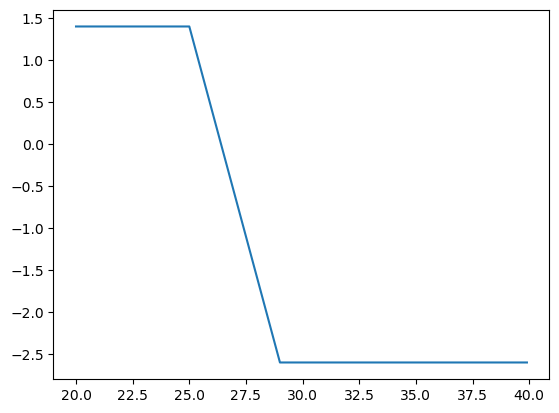

In [19]:
# 12.22 
"""
Payoff of a bear spread.
"""
K1 = 25 
K2 = 29
put_price1 = 2.15
put_price2 = 4.75

put_payoff1 = [max(0, K1 - s) - put_price1 for s in np.arange(20, 40, 0.1)]
put_payoff2 = [max(0, K2 - s) - put_price2 for s in np.arange(20, 40, 0.1)]

bearspread_payoff = [-p1 + p2 for p1, p2 in zip(put_payoff1, put_payoff2)]
bearspread_payoff = pd.Series(bearspread_payoff, index=np.arange(20, 40, 0.1))
bearspread_payoff.plot()

<Axes: >

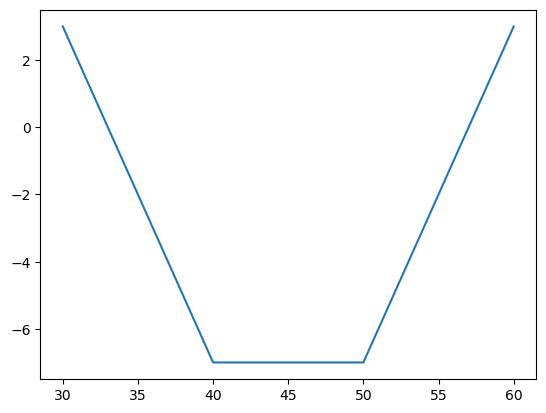

In [22]:
# 12.23 
"""
Payoff of a strangle.
"""
call_K = 50
put_K = 40
call_price = 3
put_price = 4

call_payoff = [max(0, s - call_K) - call_price for s in np.arange(30, 60.1, 0.1)]
put_payoff = [max(0, put_K - s) - put_price for s in np.arange(30, 60.1, 0.1)]

strangle_payoff = [c + p for c, p in zip(call_payoff, put_payoff)]
strangle_payoff = pd.Series(strangle_payoff, index=np.arange(30, 60.1, 0.1))
strangle_payoff.plot()